In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = ['serif']
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams['font.size']=15

In [4]:
import requests
from io import StringIO

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#**Data Loading**

In [6]:
df1=pd.read_csv('/content/drive/MyDrive/eda_case_study/application_data.csv')
df2=pd.read_csv('/content/drive/MyDrive/eda_case_study/previous_application.csv')

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/CaseStudyEDA/EDAdata/application_data.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/CaseStudyEDA/EDAdata/previous_application.csv')

In [7]:
#inspect shape
df1.shape,df2.shape

((307511, 122), (1670214, 37))

#**Data Cleaning**

#find numeric/non-numeric column

In [ ]:
#numeric columns
df1.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
#str/object columns
df1.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

#find columns with NA

In [ ]:
#columns with large >50% missing values
df1.columns[df1.isna().sum()/len(df1)>=0.5] 

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [8]:
#dropping columns with more than 50% missing values
df1=df1[df1.columns[df1.isna().sum()/len(df1)<0.5]] #df with columns with less than 50% mising values
df1.shape

(307511, 81)

In [ ]:
#numerical columns with missing values (missing percentages)
(df1.select_dtypes(include='number').isna().sum()*100/len(df1)).sort_values(ascending=False).head(25)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
FLAG_MOBIL                       0

In [ ]:
#object columns with missing values (missing percentages)
(df1.select_dtypes(include='object').isna().sum()*100/len(df1)).sort_values(ascending=False).head(10)

EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
ORGANIZATION_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
dtype: float64

#Exploring FILLNA methods (numeric columns)

#plotting distributions to find reliable statistics to replace missing values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


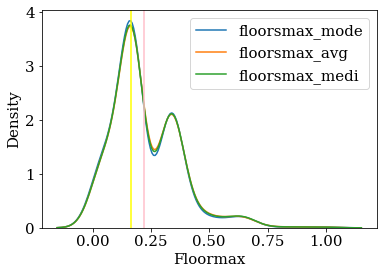

In [ ]:
cols=['FLOORSMAX_MODE','FLOORSMAX_AVG','FLOORSMAX_MEDI'] #1st. set of similar columns with missing values
ax = plt.gca() 
for col in cols:
    sns.kdeplot(df1[col],label=col.lower(),bw=0.35,ax=ax)
plt.xlabel('Floormax')
plt.axvline(df1[cols[0]].mean(),color='pink')
plt.axvline(df1[cols[0]].median(),color='yellow')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


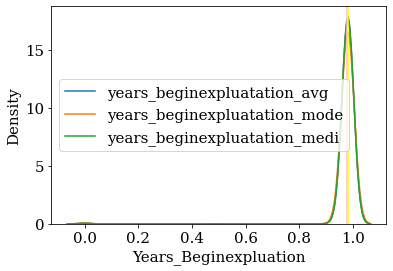

In [ ]:
cols=['YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI'] #2nd. set of similar columns with missing values
ax = plt.gca() 
for col in cols:
    sns.kdeplot(df1[col],label=col.lower(),bw=0.35,ax=ax)
plt.xlabel('Years_Beginexpluation')
plt.axvline(df1[cols[0]].mean(),color='pink')
plt.axvline(df1[cols[0]].median(),color='yellow')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


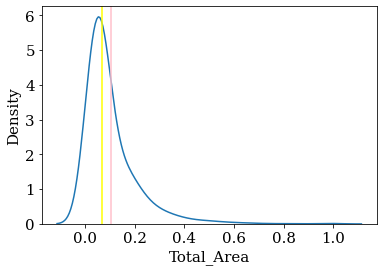

In [ ]:
cols=['TOTALAREA_MODE'] #3rd. set of similar columns with missing values
for col in cols:
    sns.kdeplot(df1[col],bw=0.35)
plt.xlabel('Total_Area')
plt.axvline(df1[cols[0]].mean(),color='pink')
plt.axvline(df1[cols[0]].median(),color='yellow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Ext_Source')

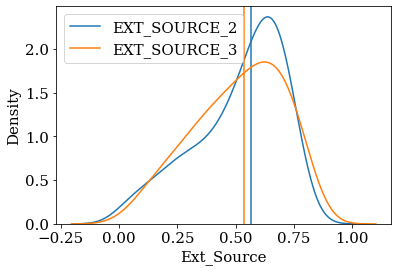

In [ ]:
cols=['EXT_SOURCE_2','EXT_SOURCE_3'] #4th. set of similar columns with missing values
for col in cols:
    sns.kdeplot(df1[col],bw=0.35,label=col)
    plt.axvline(df1[col].median(),color=plt.gca().lines[-1].get_color())
plt.legend()
plt.xlabel('Ext_Source')


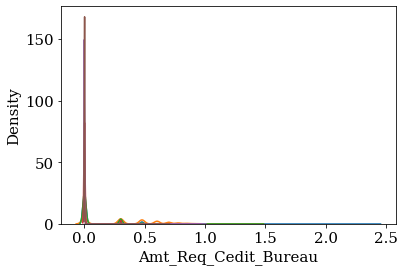

In [ ]:
cols=['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
      'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
#5th. set of similar columns with missing values
ax = plt.gca()
for col in cols:
    sns.kdeplot(np.log10(1+df1[col]),ax=ax)
plt.xlabel('Amt_Req_Cedit_Bureau')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in fav

Text(0.5, 0, '')

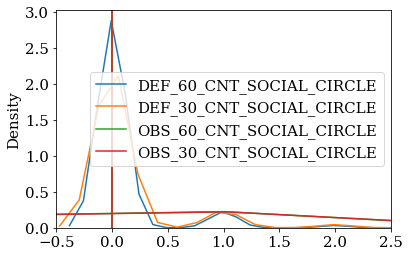

In [ ]:
cols=['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
      'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE'] #6th. set of similar columns with missing values
for col in cols:
    sns.kdeplot(df1[col],bw=0.35,label=col)
    plt.axvline(df1[col].median(),color=plt.gca().lines[-1].get_color())
plt.legend()
plt.xlim(-0.5,2.5)
plt.xlabel('')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Amt_Goods_Price')

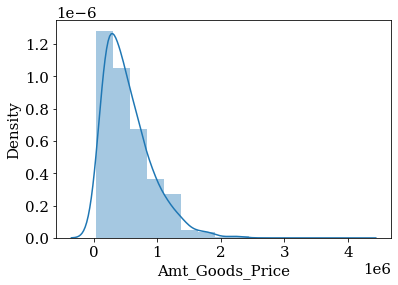

In [ ]:
cols=['AMT_GOODS_PRICE']
for col in cols:
    sns.distplot(df1[col],bins=15,kde_kws={'bw': 0.35})
plt.xlabel('Amt_Goods_Price')

#replace the missing values with the respective median



In [17]:
cols=['FLOORSMAX_MODE','FLOORSMAX_AVG','FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_AVG', 
      'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE', 
      'EXT_SOURCE_2','EXT_SOURCE_3'] 
      # except 'Amt_Req_Credit_Bureau' and 'Def' and'Obs' 
for col in cols: 
    df1[col].fillna(value=df1[col].median(),inplace=True)

#replace the missing values with the respective mode


In [18]:
# Replacing the missing values with MODE value of the respective columns'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT'
cols=['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
      'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
for col in cols:
    df1[col].fillna(df1[col].mode()[0],inplace=True)

### DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE columns deal with the social surroundings of the client and it's not appropriate to fill in the missing values without actually getting to know the rest of the members, so leaving the missing values as such


#hoping columns with <10% missing values will not significantly affect subsequent analysis - leaving them unchanged

#Exploring FILLNA methods (non-numeric columns)

#exploring columns with mising values

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

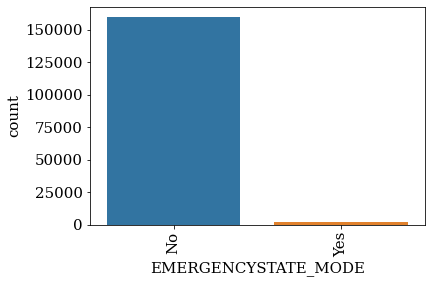

In [ ]:
sns.countplot(x=df1['EMERGENCYSTATE_MODE'])
plt.xticks(rotation=90)

###such a highly imbalanced column may not be useful as a predictor variable anyway: leaving column unchanged

In [ ]:
df_occ=(df1['OCCUPATION_TYPE'].value_counts()*100/len(df1)).sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

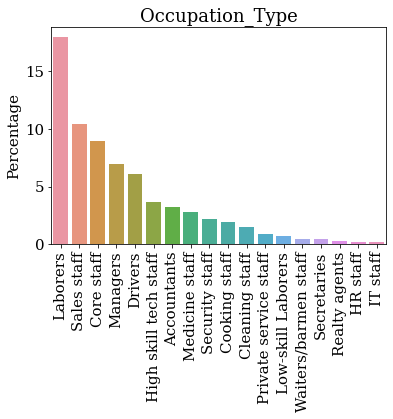

In [ ]:
sns.barplot(x=df_occ.index,y=df_occ)
plt.title('Occupation_Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

###31% of occupation type value is missing/unknown; larger percentage than any known occupation type

###may not be ideal to replace missing values in this case with any single statistic: marking them as 'Unknown'

In [20]:
df1['OCCUPATION_TYPE'].fillna(value='Unknown', inplace=True)

In [ ]:
'''df_occ_new=(df1['OCCUPATION_TYPE'].value_counts()*100/len(df1)).sort_values(ascending=False)
sns.barplot(x=df_occ_new.index,y=df_occ_new)
plt.title('Occupation_Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)'''

"df_occ_new=(df1['OCCUPATION_TYPE'].value_counts()*100/len(df1)).sort_values(ascending=False)\nsns.barplot(x=df_occ_new.index,y=df_occ_new)\nplt.title('Occupation_Type')\nplt.ylabel('Percentage')\nplt.xticks(rotation=90)"

#**Univariate Analysis**

#Exploring the prevalence of applying for loan among different categories in each categorical column

In [21]:
# Numerical columns separation
num_col=df1.select_dtypes(include='number').columns

In [22]:
# Categorical columns separation
cat_col=df1.select_dtypes(include='object').columns

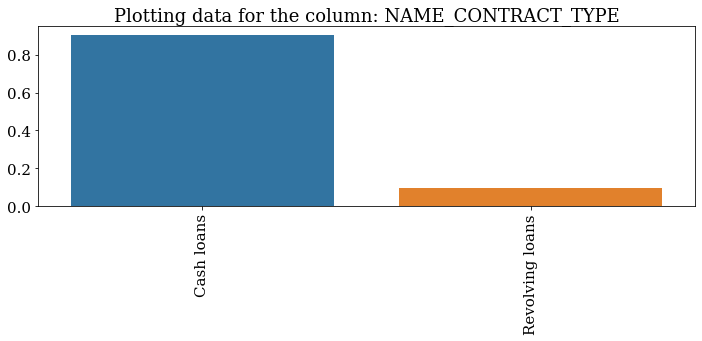

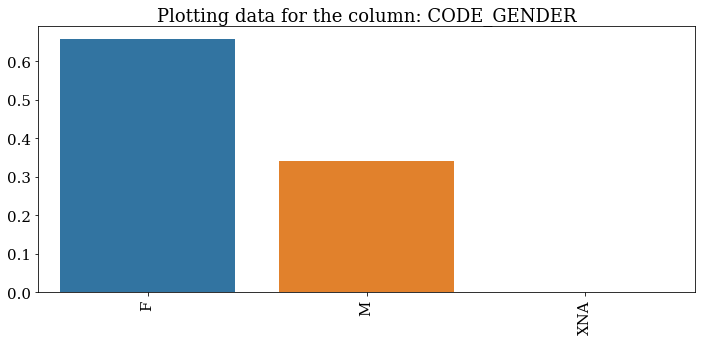

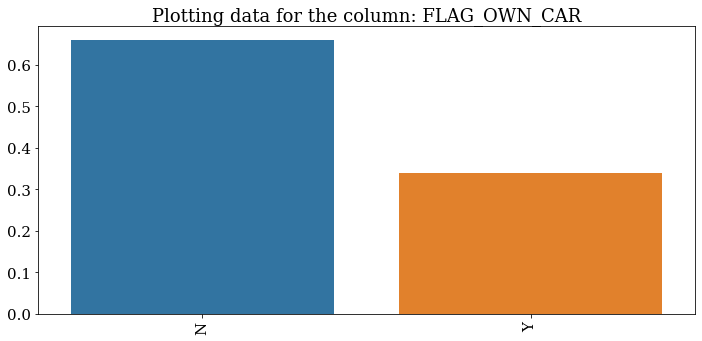

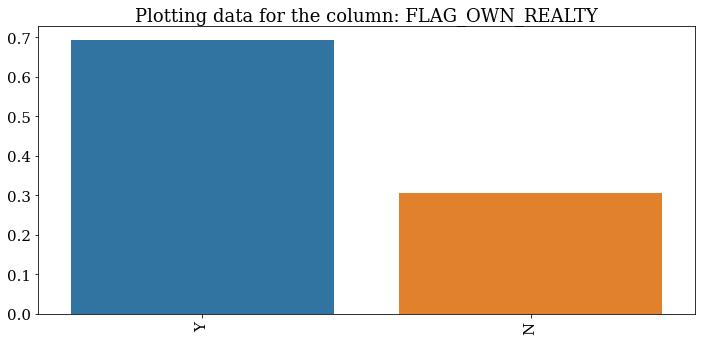

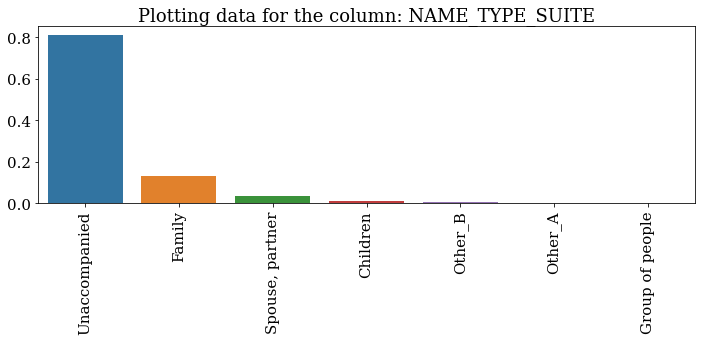

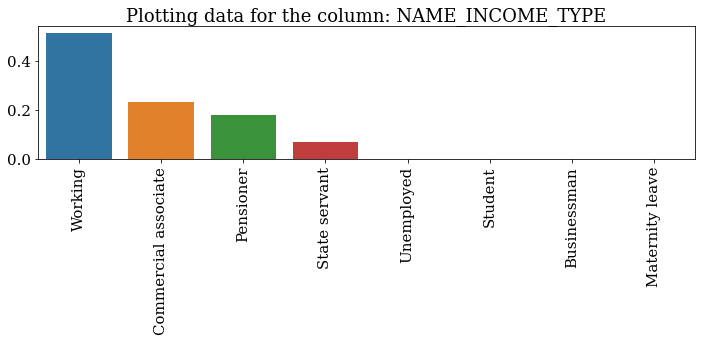

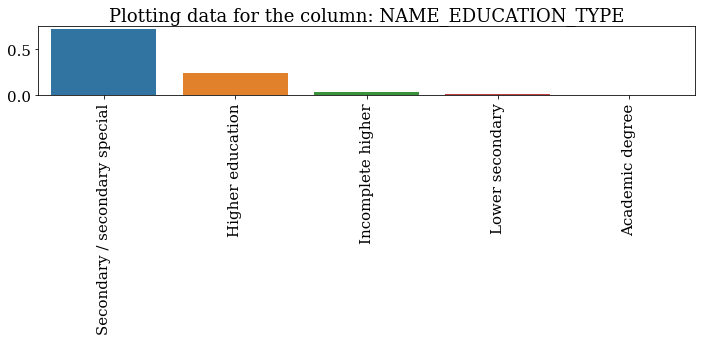

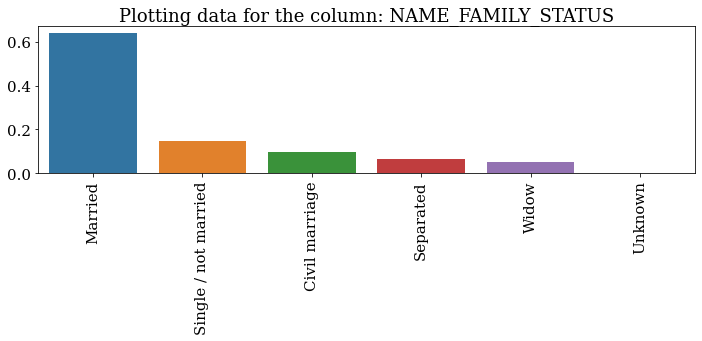

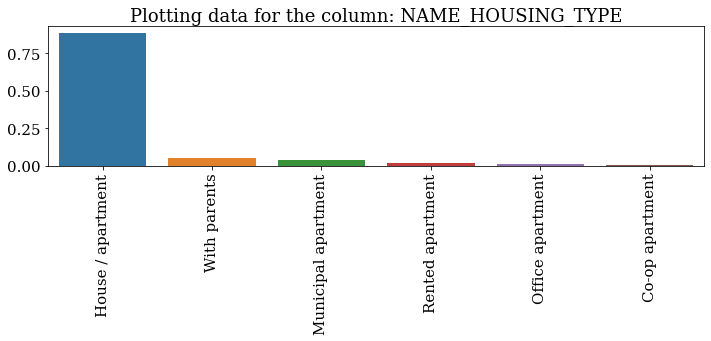

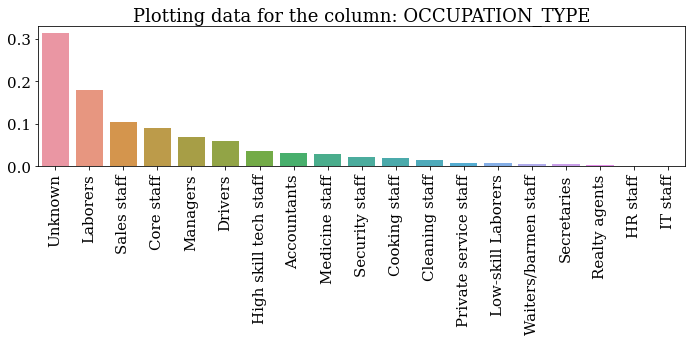

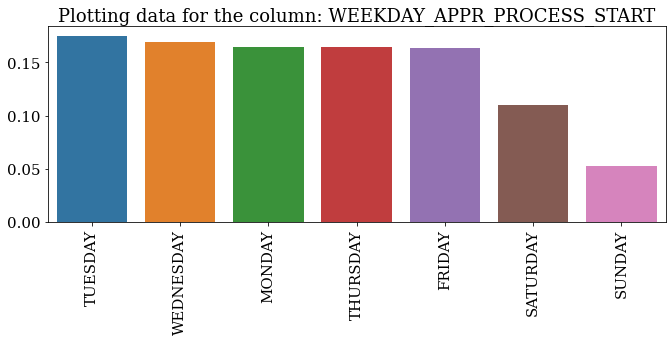

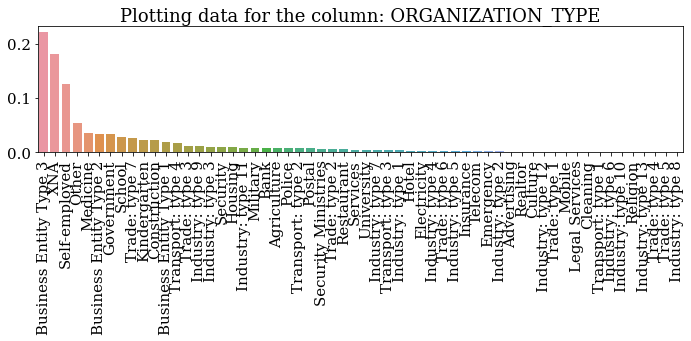

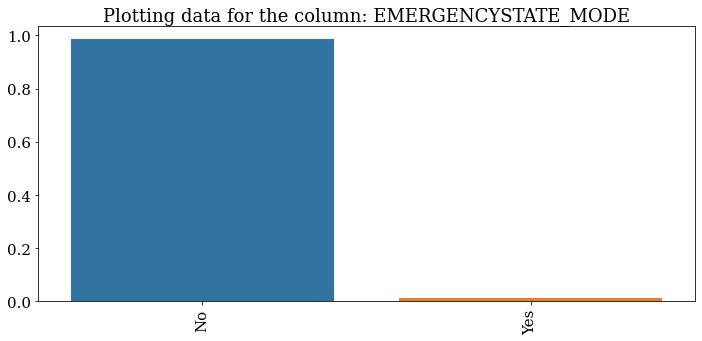

In [23]:
#exploring loan application by catagory
for col in cat_col:
    fig,ax=plt.subplots(1,1, figsize=(10,5))
    dfc=df1[col].value_counts(normalize=True)
    sns.barplot(x=dfc.index,y=dfc,ax=ax)
    #ax.barplot(df1[col].value_counts())
    ax.set(ylabel=None)
    plt.xticks(rotation=90)
    ax.set_title('Plotting data for the column: '+ col)
    fig.tight_layout()

#**Bivariate Analysis**

# Target Values

Target=0 : payment difficulty, Target=1: otherwise


In [24]:
#Percentage distribution of target
df1.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [25]:
# Ratio of imbalance in target variable
(df1.TARGET==0).sum()/(df1.TARGET==1).sum()

11.387150050352467

#### Imbalance identified in the 'TARGET' variable, therefore we explore each of them separately to obtain insights.



In [ ]:
# t_0 has target value 'zero' and t_1 has target value 'one'
t_0 = df1.loc[df1.TARGET==0]
t_1 = df1.loc[df1.TARGET==1]

# Probability of default for each category under each category column

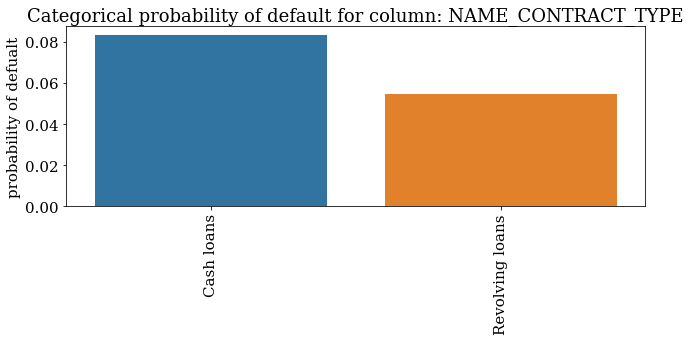

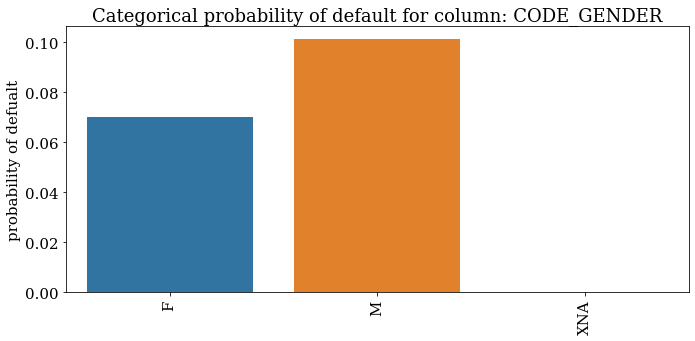

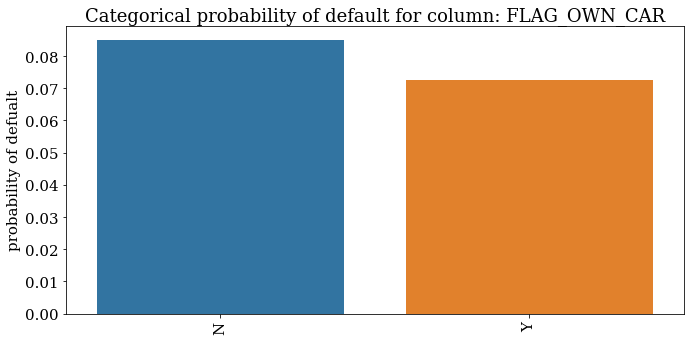

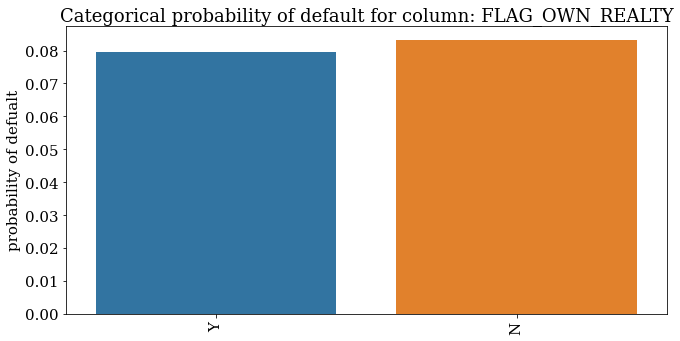

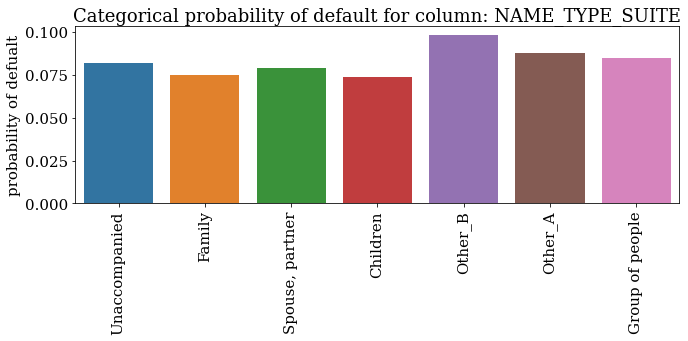

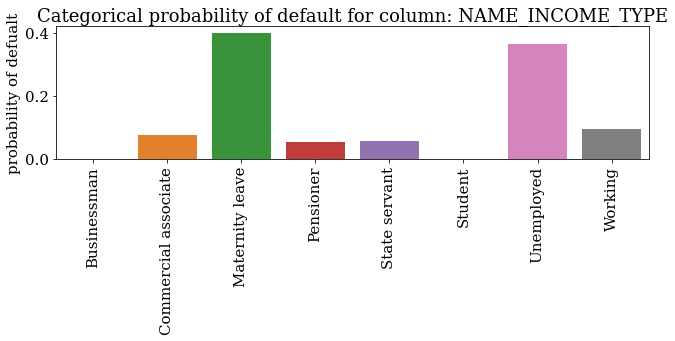

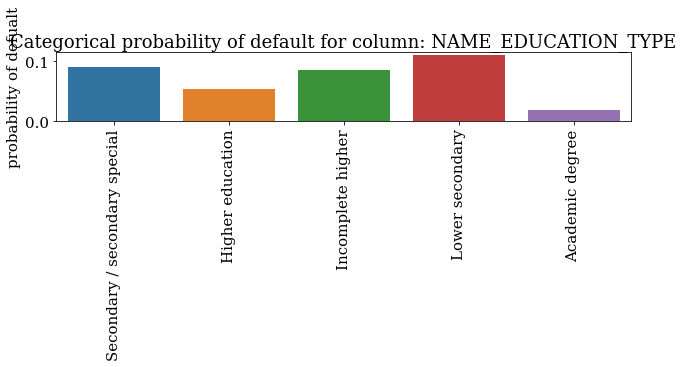

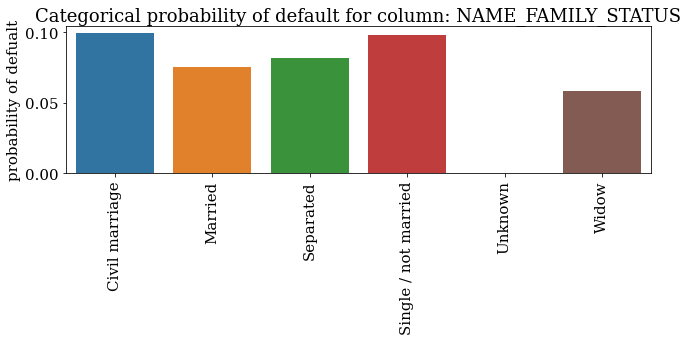

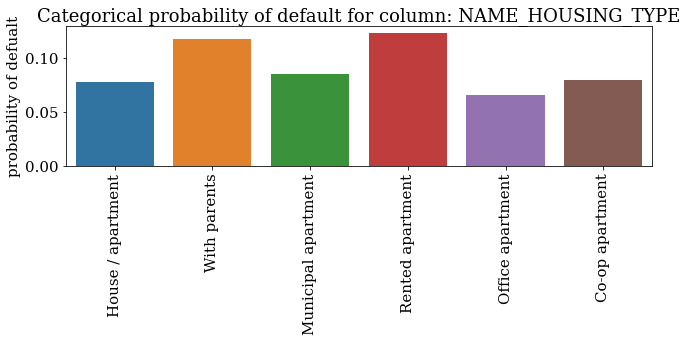

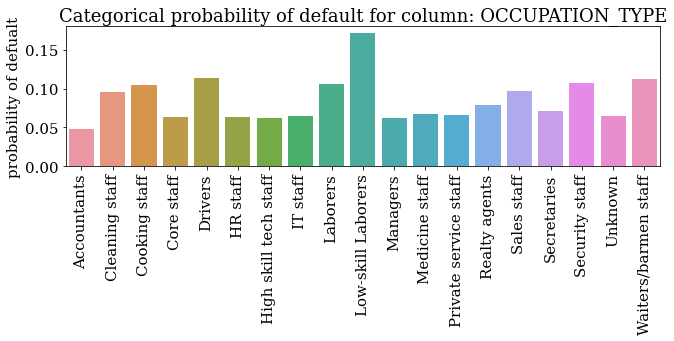

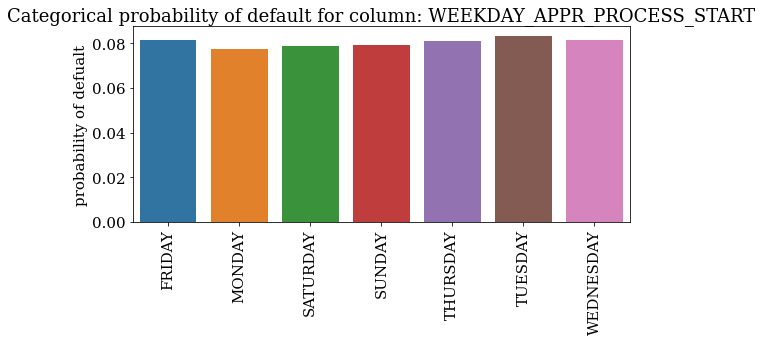

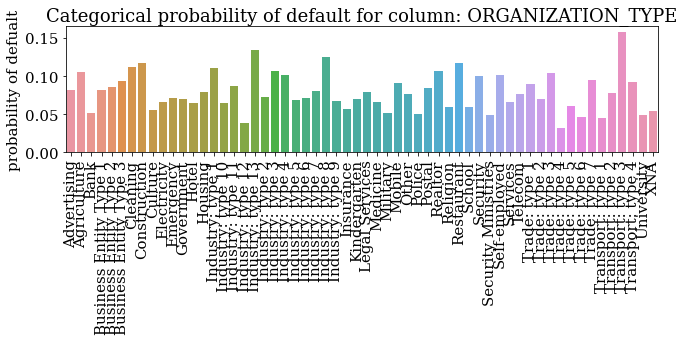

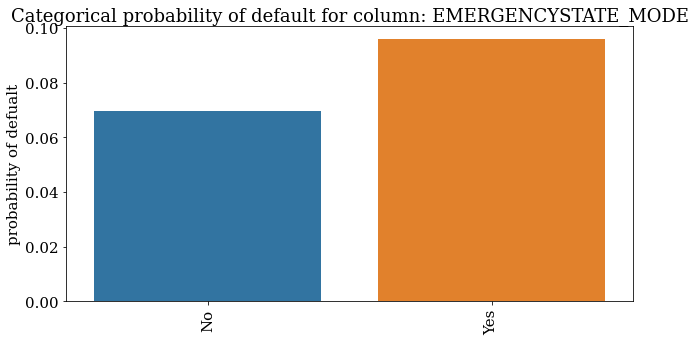

In [ ]:
#exploring probability of default for each category
for col in cat_col:
    fig,ax=plt.subplots(1,1, figsize=(10,5))
    # fraction of applicants in each catagory in catagory column who defaulted 
    #or the Categorical probability of default for the category column
    dfp=t_1[col].value_counts().div(df1[col].value_counts())
    sns.barplot(x=dfp.index,y=dfp,ax=ax)
    ax.set(ylabel='probability of defualt')
    plt.xticks(rotation=90)
    ax.set_title('Categorical probability of default for column: '+ col)
    fig.tight_layout()

# Insights

#### NAME_CONTRACT_TYPE
- More clients apply for cash loans than revolving loans.
- However, difference in the risk of default between the two two categories is not as large as the difference in application for the two categories

#### CODE_GENDER
- Female clients tend to apply for loans more than compared male clients
- Risk of default is higher among males than females

#### FLAG_OWN_CAR

- Majority of the applicants donot own a car.
- Possibility of default is more among those not owning a car.

#### NAME_TYPE_SUITE
- Most people come alone 'Unaccompanied' to apply for loans.
- This category variable is not a great predictor for default.

#### NAME_INCOME_TYPE
- Clients with income type 'Working' apply for more number loans.
- Risk of default is highest for those in 'Maternity Leave' followed closely by 'Unemployed' even though they constitute a small fraction of loan applicants. These two categories thus could be flagged for significant risk of default.

#### NAME_EDUCATION_TYPE
- Secondary/secodary special educated clients apply for loans more than other categories.
- Risk of default is highest among those with lower secondary education. Those with an academic degree are a relatively less prone to default on loans. 

####  NAME_FAMILY_STATUS
- Married clients contribute a greater count in terms of applying to loan at the same time they are also the greater loan defaulters.
- Even though other categories apply much less frequently for loans, the risk of default is not largely different; eg.- 'Single/Not Married' clients default at a similar rate as those 'Married'.


####  NAME_HOUSING_TYPE
- Applicants staying with parents or in rented apartments are at a significantly higher risk of default than other categories.

####  OCCUPATION_TYPE
- 'Low Skill Labouers' are at a significantly higer risk of default than those in other categories.

##### EMERGENCYSTATE_MODE
- Clients without emergency state mode 'Yes' default more on loans than those with emergency state mode 'No'.

# Exploring relationship among the numerical columns

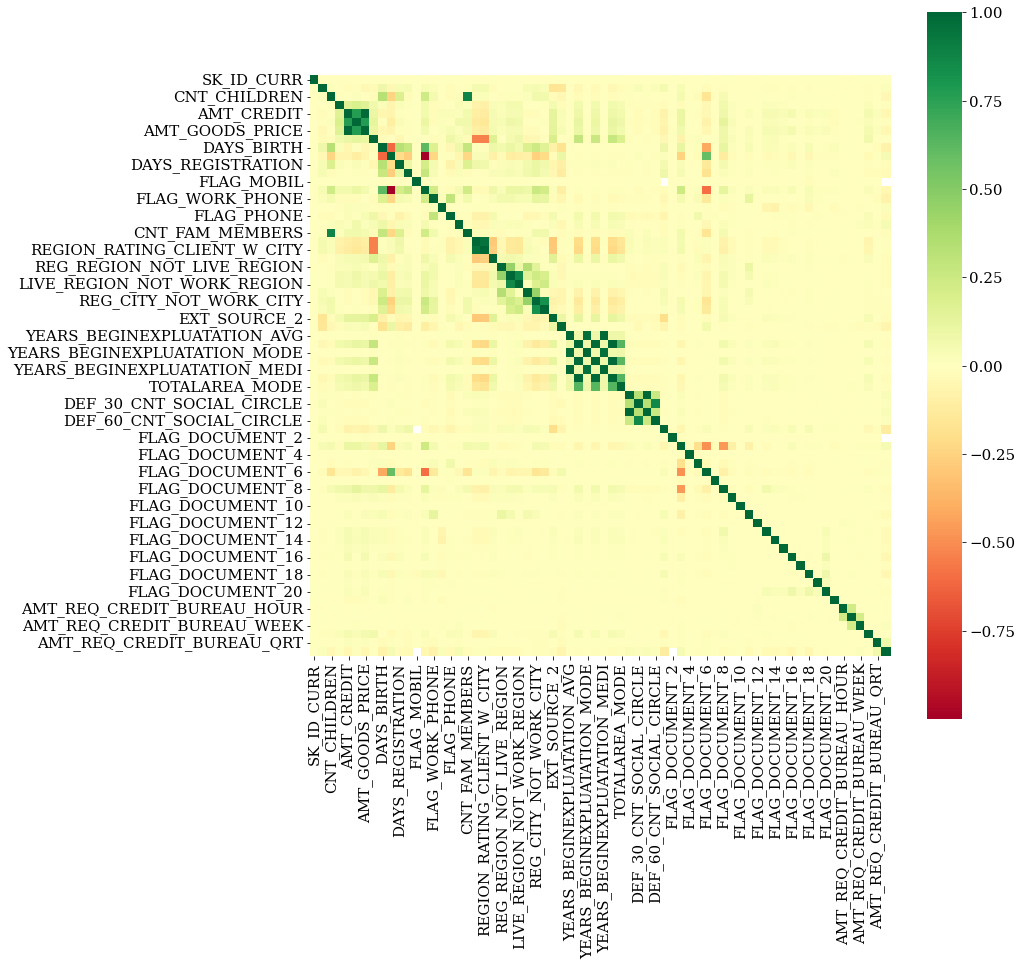

In [ ]:
#heatmap of correalation between numerical columns
plt.figure(figsize=(13,13))
sns.heatmap(df1[num_col].corr(),cmap='RdYlGn',square=True)

# Finding top correlations

In [ ]:
num_col_corr=df1[num_col].corr().abs().unstack() # taking absolute correaltion values
num_col_corr=num_col_corr[num_col_corr != 1] # dropping self-correlation values
#arrange the corr values in descending fasion and select only unique pairs
corr_vals=num_col_corr.dropna().sort_values(ascending=False).iloc[::2]
#top 15 correlations
print('=== Top 15 correlation in the total applicant population ===')
print(corr_vals.head(15))

=== Top 15 correlation in the total applicant population ===
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999755
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997260
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993838
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989001
AMT_GOODS_PRICE               AMT_CREDIT                      0.986968
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986610
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971950
                              YEARS_BEGINEXPLUATATION_MEDI    0.963610
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.950842
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.879161
LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION      0.860627
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.860517
LIVE_CITY_NOT_WO

In [ ]:
num_col_corr=t_1[num_col].corr().abs().unstack() # taking absolute correaltion values
num_col_corr=num_col_corr[num_col_corr != 1] # dropping self-correlation values
#arrange the corr values in descending fashion and select only unique pairs
corr_vals=num_col_corr.dropna().sort_values(ascending=False).iloc[::2]
#top 15 correlations
print('=== Top 15 correlation in the defaulter population ===')
print(corr_vals.head(15))

=== Top 15 correlation in the defaulter population ===
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998269
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996139
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989472
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986935
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980546
                              YEARS_BEGINEXPLUATATION_MEDI    0.978163
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.885484
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE        0.868994
LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION      0.847885
LIVE_CITY_NOT_WORK_CIT

Analysis using scatterplot

# Analysis numerical columns wrt Target using boxplot 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

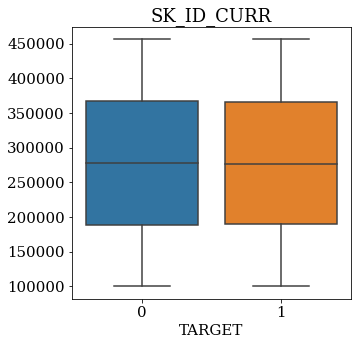

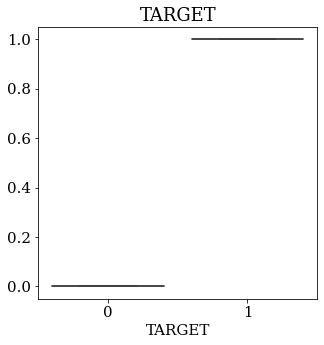

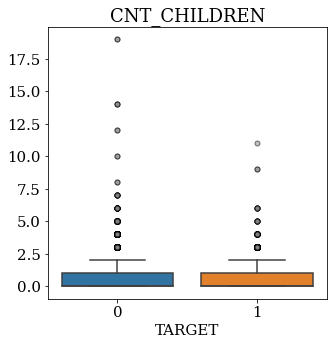

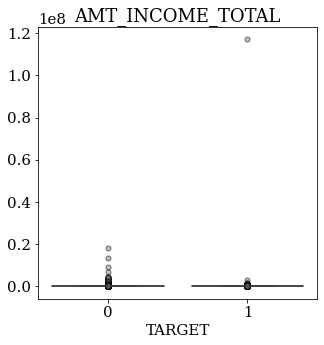

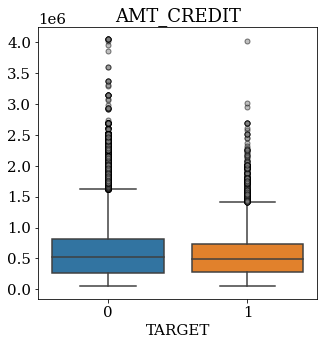

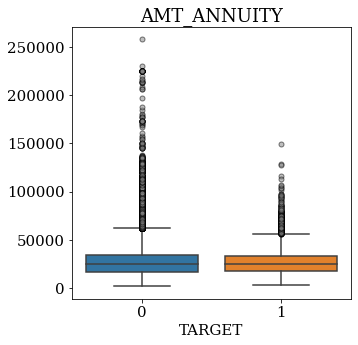

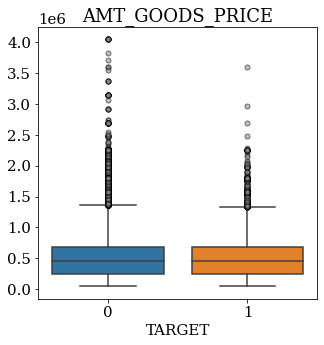

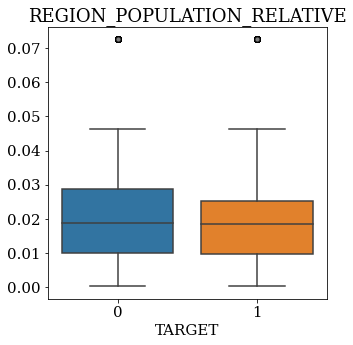

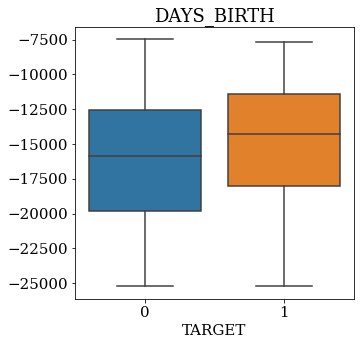

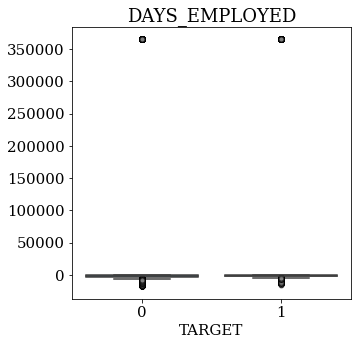

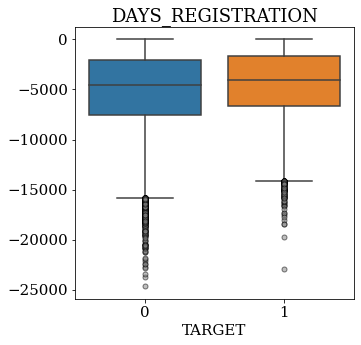

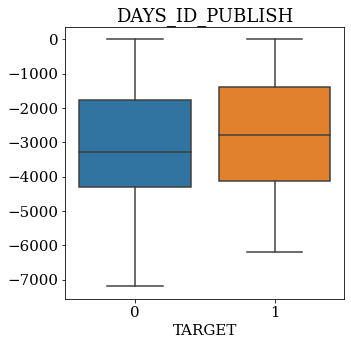

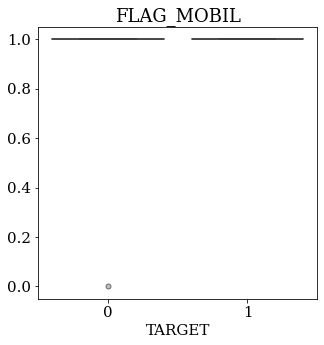

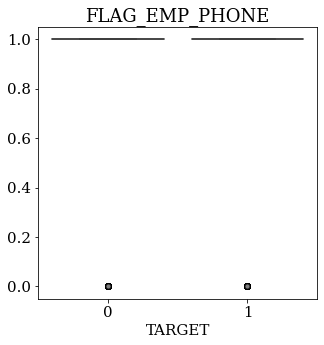

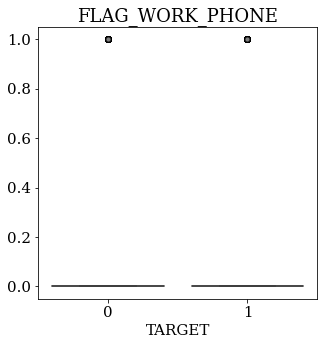

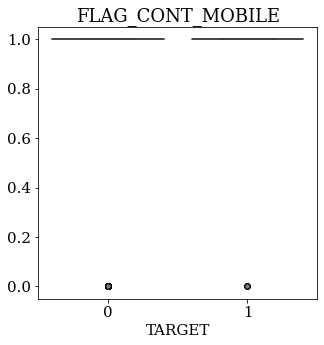

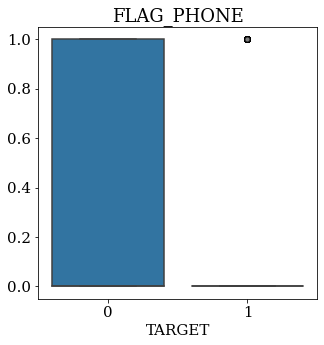

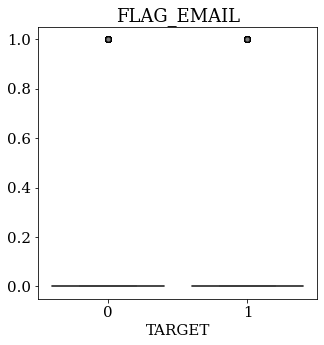

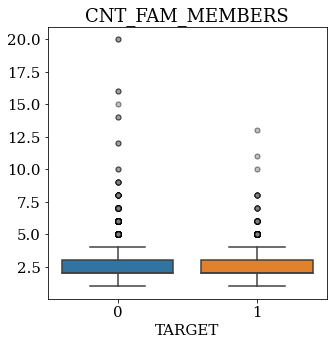

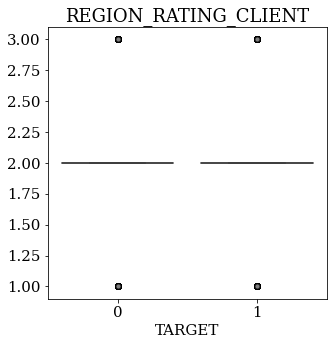

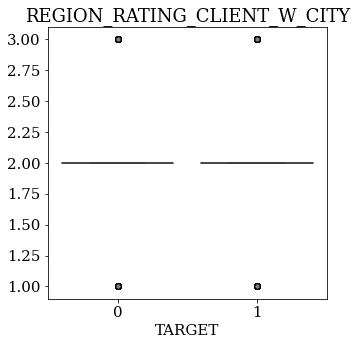

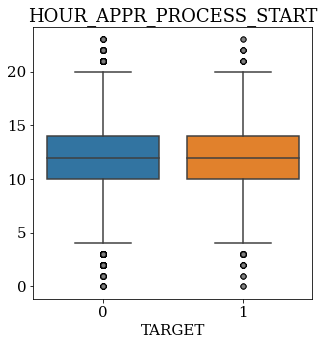

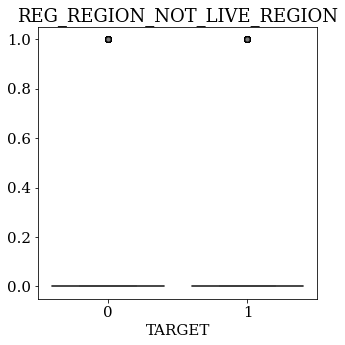

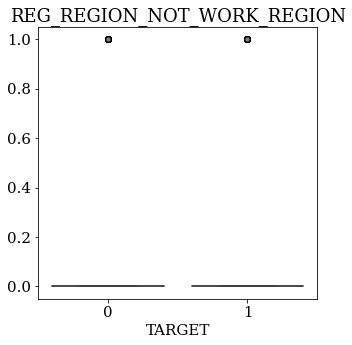

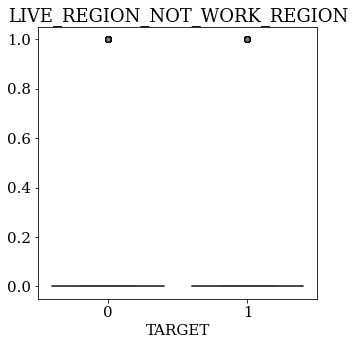

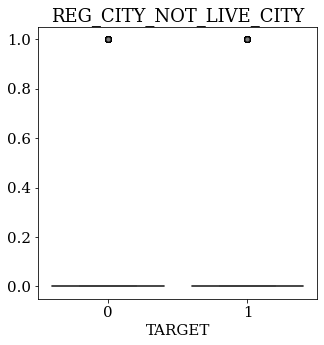

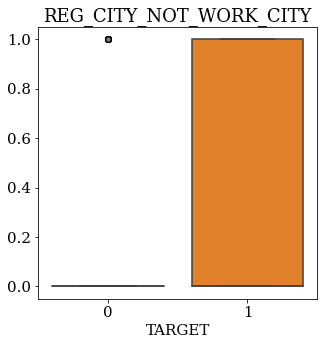

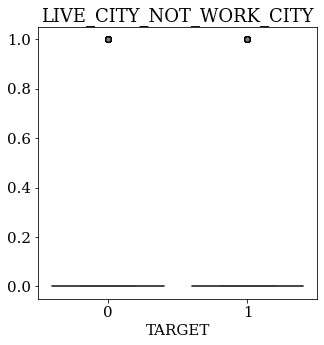

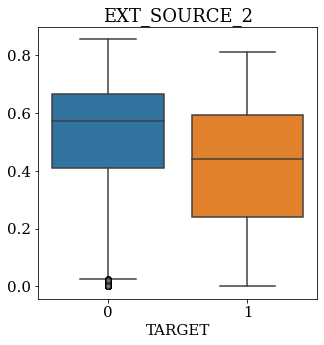

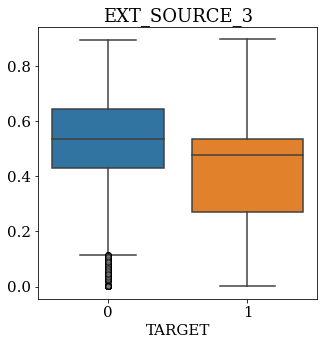

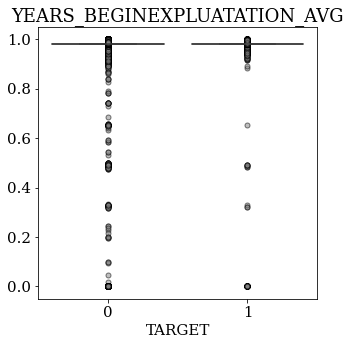

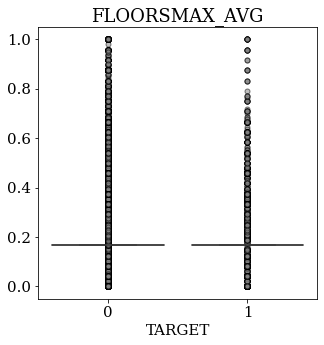

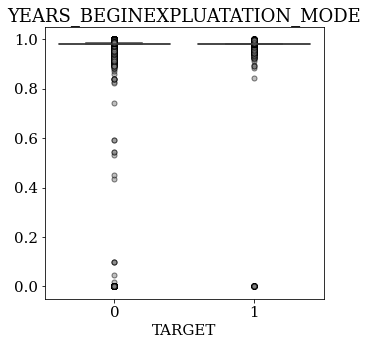

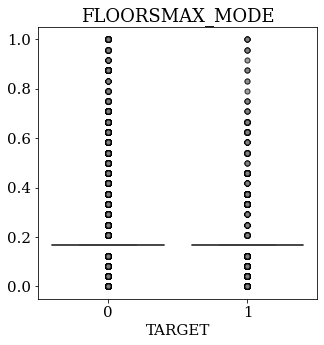

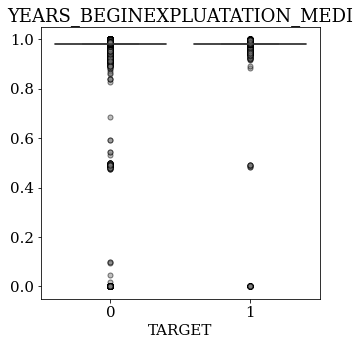

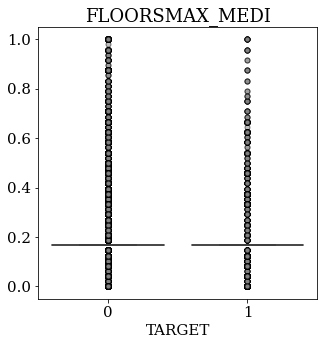

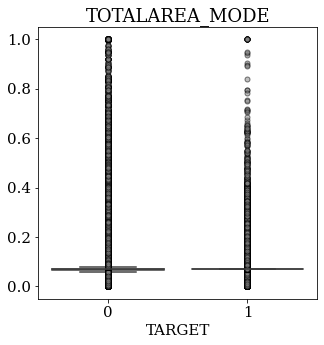

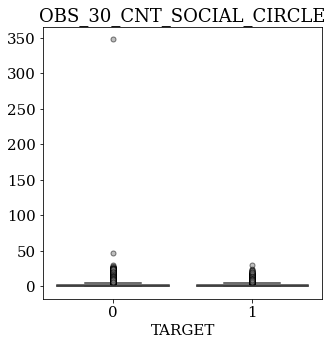

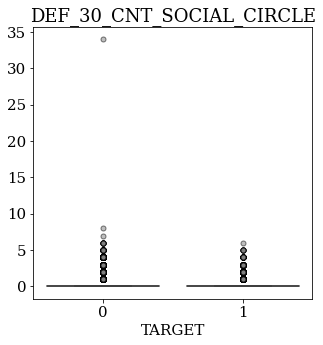

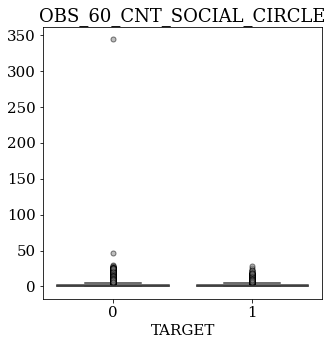

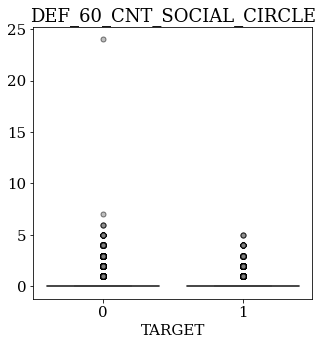

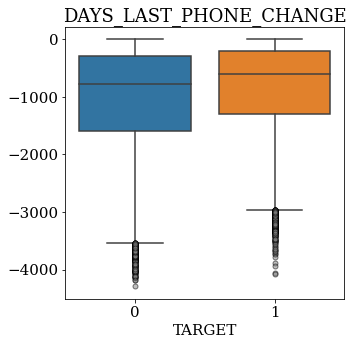

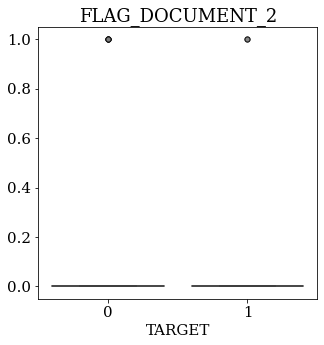

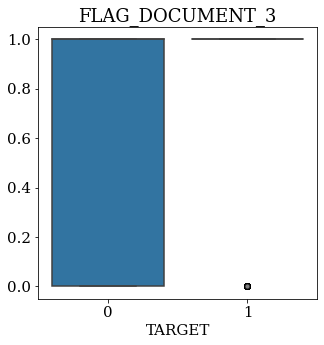

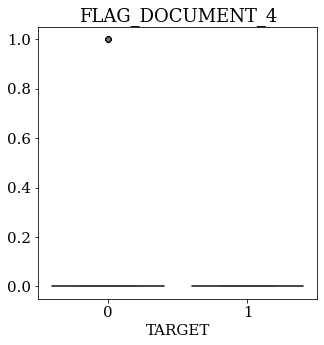

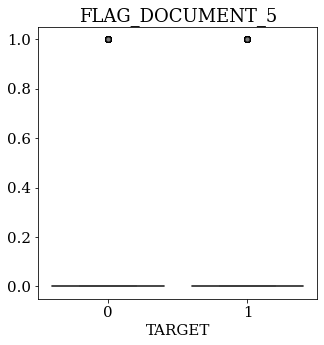

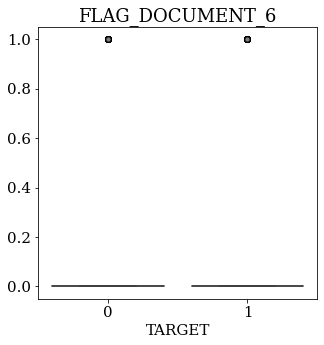

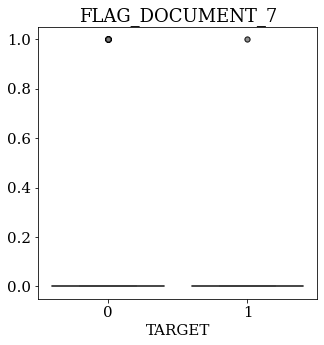

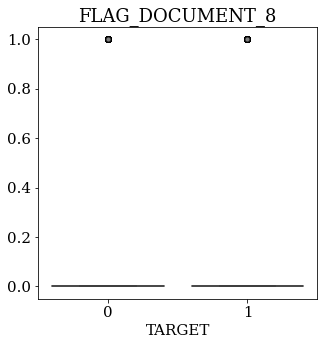

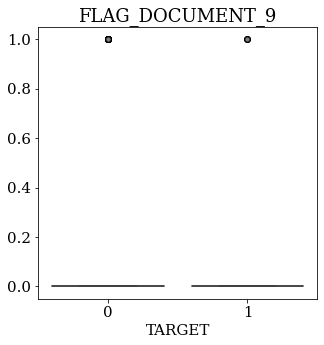

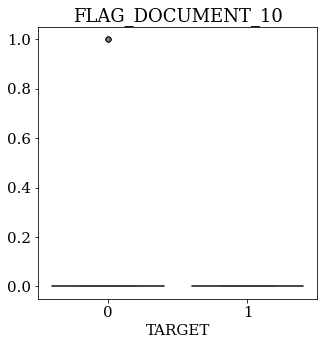

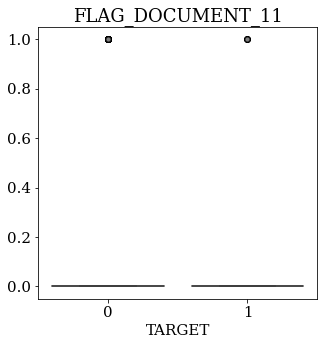

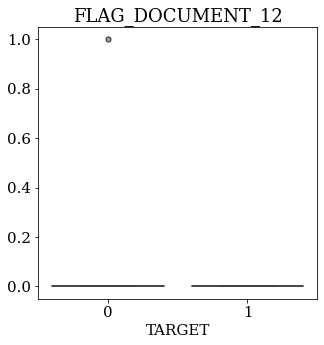

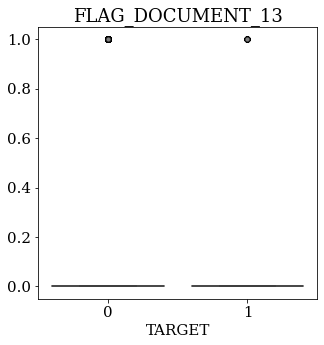

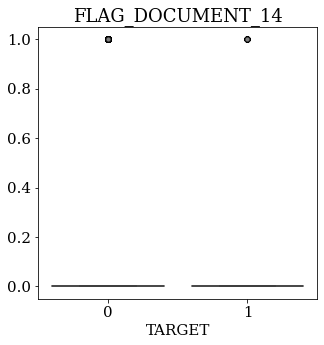

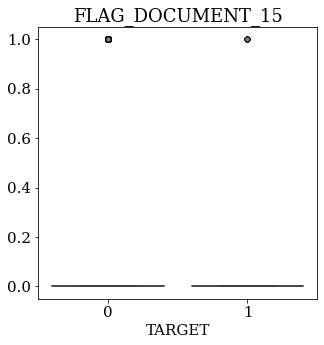

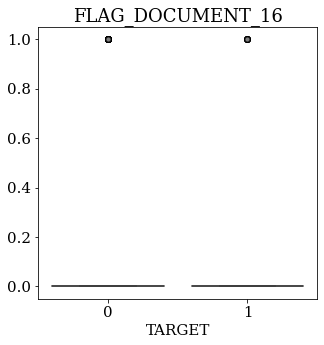

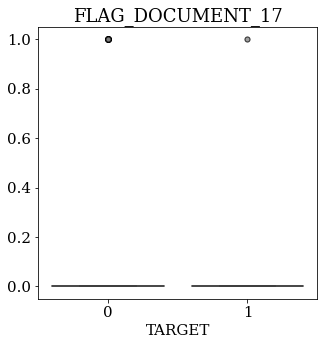

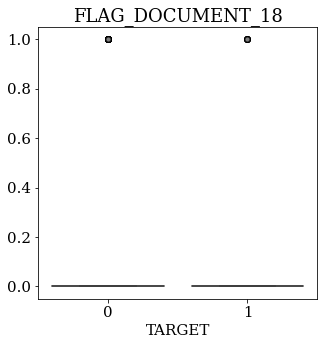

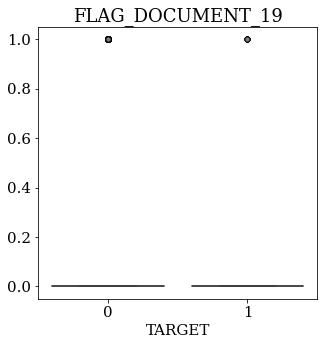

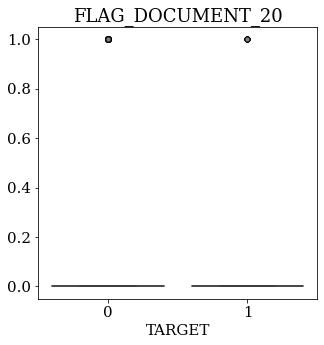

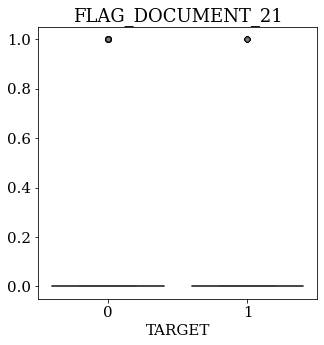

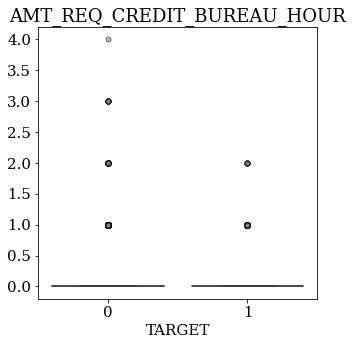

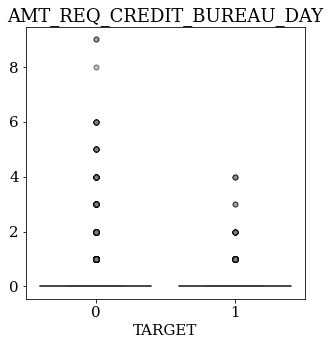

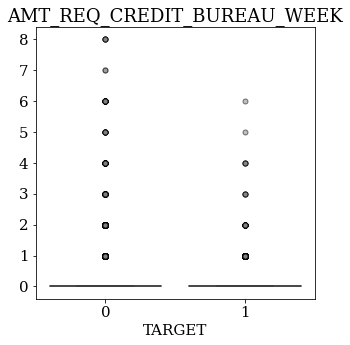

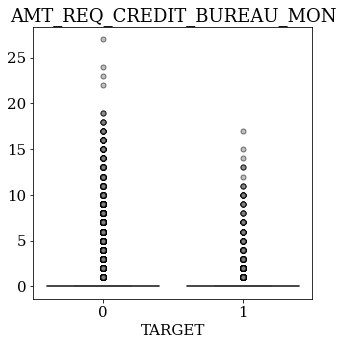

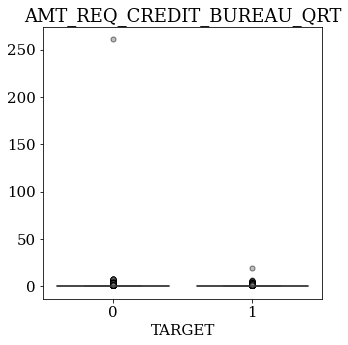

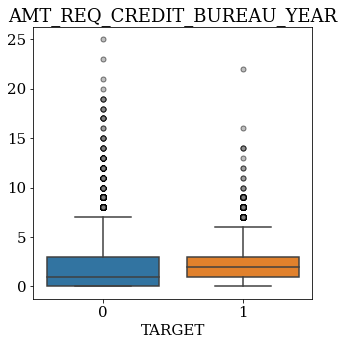

In [ ]:
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5,  markeredgecolor='black')
for col in num_col:
    fig,ax=plt.subplots(1,1, figsize=(5,5))
    sns.boxplot(x=df1['TARGET'],y=df1[col],flierprops=flierprops,ax=ax);
    plt.ylabel(None)
    plt.title(col)

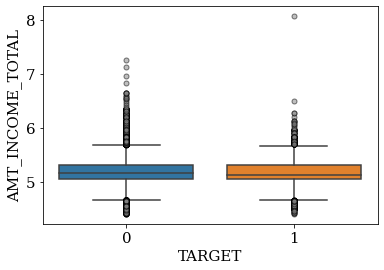

In [ ]:
#analyzing log of 'AMT_INCOME_TOTAL' column 
sns.boxplot(x=df1['TARGET'],y=np.log10(df1['AMT_INCOME_TOTAL']),flierprops=flierprops);

# Insights

- Defaults are relatively less for clients with relatively higher income.
- Defaults are relatively less for loans with high credit amount.
- Defaults are relatively less for loans with higher annuity amount.
- Mean age of defaulters are less than non-defaulters.
- Clients with much older registration are less like to default than those who change d registration recently.
- Clients who changed id more recently are more likely to default.
- Mean of ext source 2 score for defaulters is significantly less than non defaulters.
- Mean of ext source 3 score for defaulters is significantly less than non defaulters.
- Those who had changed their phone number more recently are more likely to default.

# PREVIOUS APPLICATION

In [ ]:
##finding the percentage of missing values
df2.isna().sum()/len(df2)*100

In [26]:
### removing cols with more than 50% of missing values
df2=df2[df2.columns[(df2.isna().sum()/len(df2)*100)<50.0]]

In [31]:
#numerical columns with missing values
(df2.select_dtypes(include=['int','float']).isna().sum()/len(df2)*100).sort_values(ascending=False).head(12)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
AMT_CREDIT                    0.000060
SK_ID_CURR                    0.000000
AMT_APPLICATION               0.000000
dtype: float64

In [32]:
#non-numerical columns with missing values
(df2.select_dtypes(include=['object']).isna().sum()/len(df2)*100).sort_values(ascending=False).head(12)

NAME_TYPE_SUITE         49.119754
PRODUCT_COMBINATION      0.020716
NAME_YIELD_GROUP         0.000000
NAME_SELLER_INDUSTRY     0.000000
CHANNEL_TYPE             0.000000
NAME_PRODUCT_TYPE        0.000000
NAME_PORTFOLIO           0.000000
NAME_GOODS_CATEGORY      0.000000
NAME_CLIENT_TYPE         0.000000
CODE_REJECT_REASON       0.000000
NAME_PAYMENT_TYPE        0.000000
NAME_CONTRACT_STATUS     0.000000
dtype: float64

In [28]:
prev_numerical=df2.select_dtypes(include=['int','float']).columns

In [29]:
prev_categorical=df2.select_dtypes(include=['object']).columns

# Exploring Fill NA methods (Numerical columns)

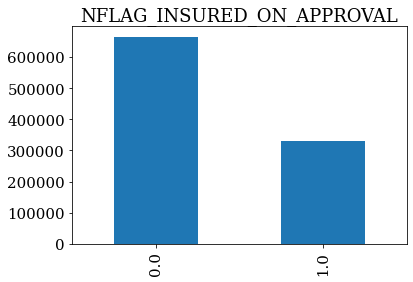

In [34]:
df2.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.bar()
plt.title('NFLAG_INSURED_ON_APPROVAL')
plt.show()

In [50]:
### Filling the missing values with mode for insured_on_approval
df2.NFLAG_INSURED_ON_APPROVAL.fillna(df2.NFLAG_INSURED_ON_APPROVAL.mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in fav

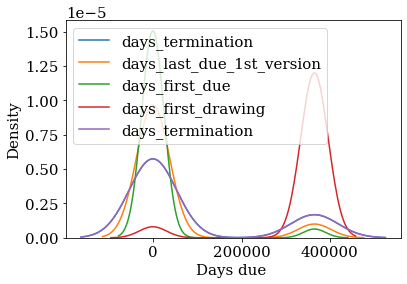

In [40]:
cols=['DAYS_TERMINATION','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE',
      'DAYS_FIRST_DRAWING','DAYS_TERMINATION'] #1st. set of similar columns with missing values
ax = plt.gca() 
for col in cols:
    sns.kdeplot(df2[col],label=col.lower(),bw=0.35,ax=ax)
plt.xlabel('Days due')
plt.legend()
plt.show()

The above distribution exhibits bi-modal structure and replacement of missing values with a single statistic may not be appropriate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


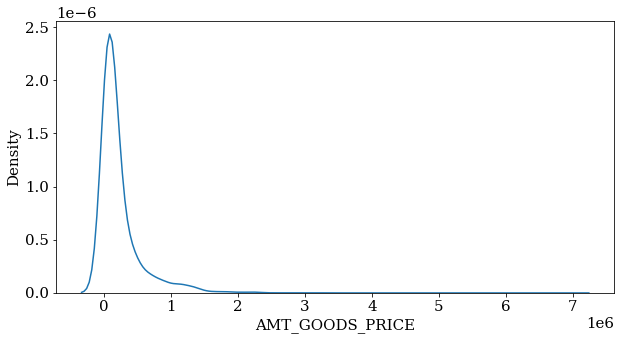

In [44]:
plt.figure(figsize=(10,5))
sns.kdeplot(df2.AMT_GOODS_PRICE,bw=0.35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


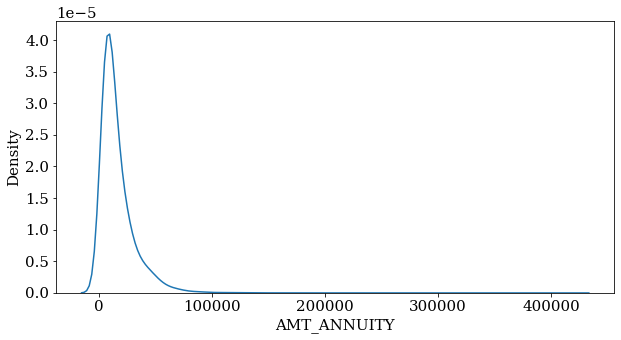

In [45]:
plt.figure(figsize=(10,5))
sns.kdeplot(df2.AMT_ANNUITY,bw=0.35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.35 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


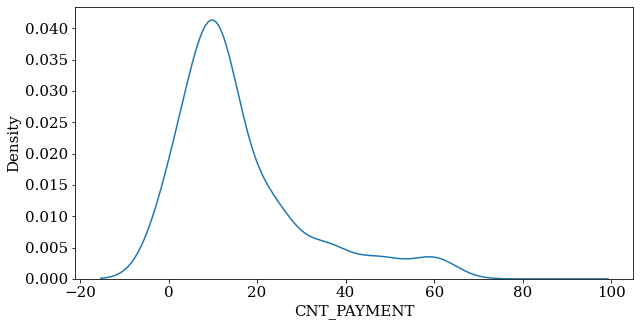

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(df2.CNT_PAYMENT,bw=0.35)
plt.show()

In [49]:
# The above distributions are suitable for replacement with a single statistic
# Filling missing values with the median for the above disttributions
cols=['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
for col in cols:
    df2[col].fillna(df2[col].median(),inplace=True)

##### NAME_TYPE_SUITE can't be predicted, 
AMT_GOODS_PRICE,CNT_PAYMENT,PRODUCT_COMBINATION,DAYS columns are unchanged due to inappropriate data,hence missing values are not filled

### Univariate analysis

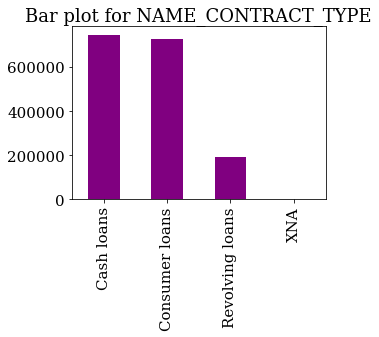

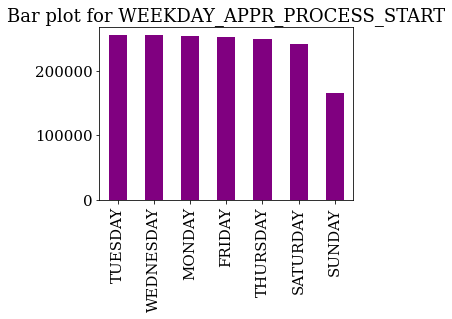

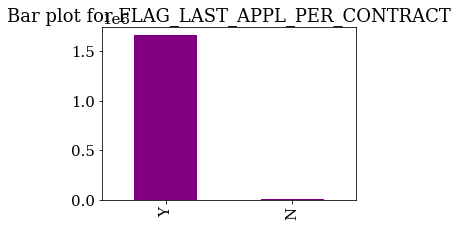

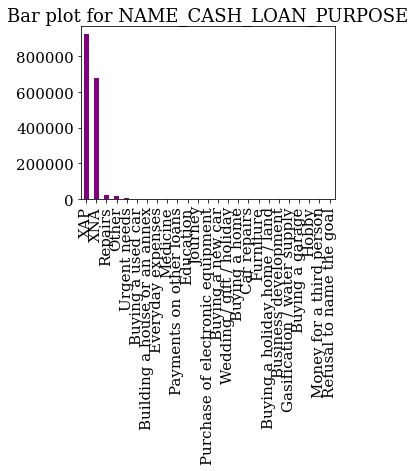

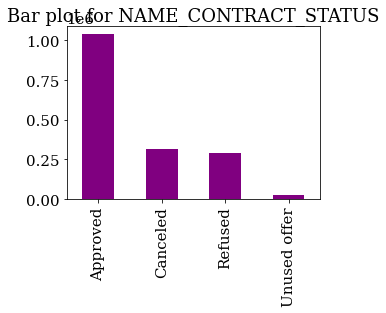

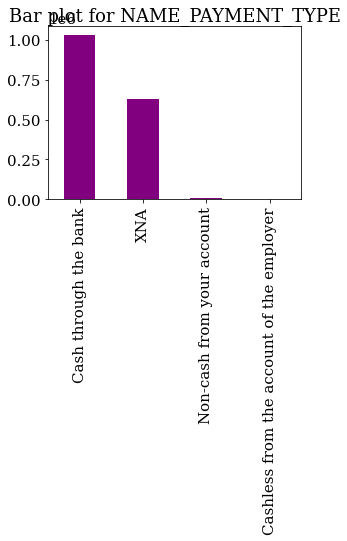

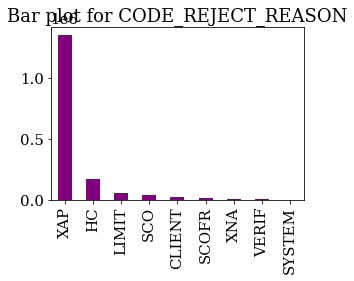

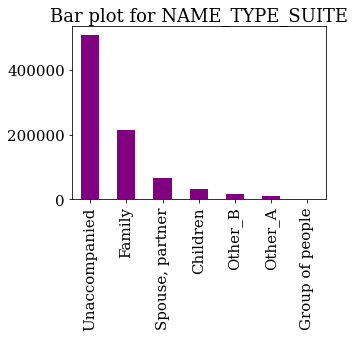

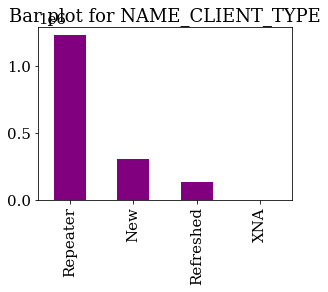

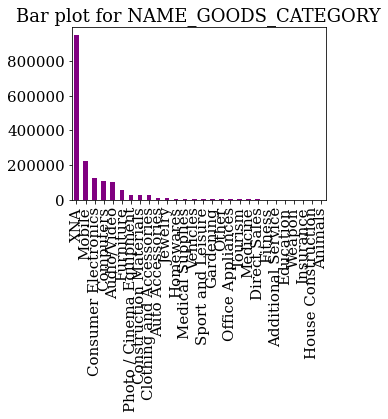

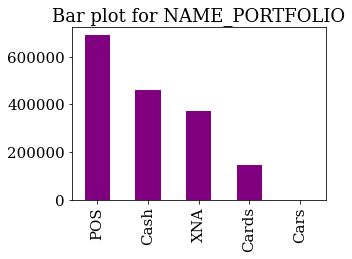

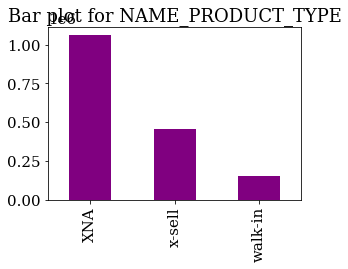

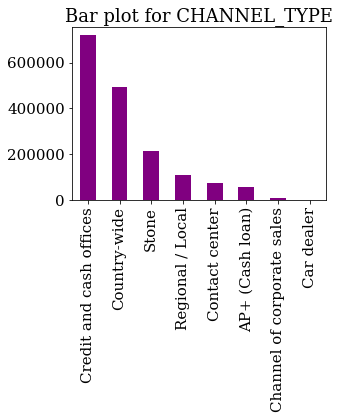

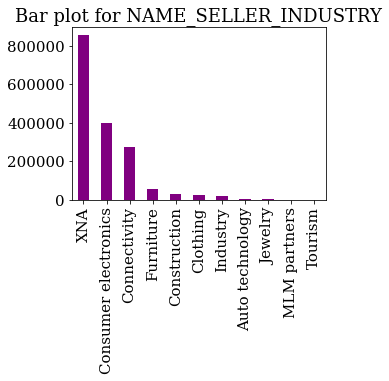

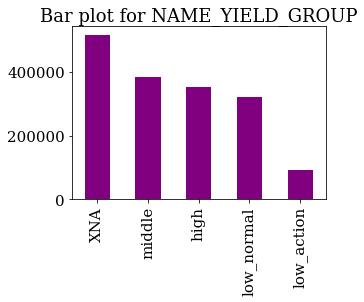

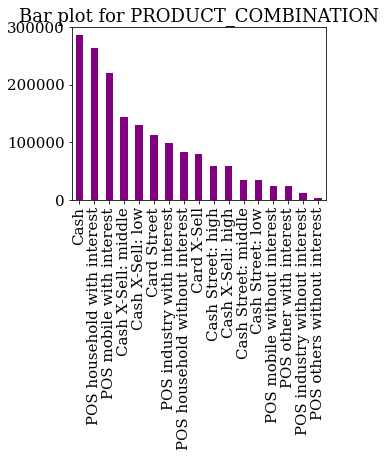

In [53]:
##Barplot
for cols in prev_categorical:
    plt.figure(figsize=(10,7))
    ax=plt.subplot(221)
    
    plt.title("Bar plot for "+cols)
    df2[cols].value_counts().plot.bar(ax=ax,color='purple')
    plt.xticks(rotation=90)
    plt.show()


### Insights
##### NAME_CONTRACT_TYPE
- Cash loans and consumer loans contribute more or less equally. They are more popular than revolving loans. 
##### WEEKDAY_APPR_PROCESS_START
- Sunday has been recorded the lowest in terms of applying for loan.
##### NAME_CONTRACT_STATUS
- Maximum number of contracts were approved comparatively.
##### NAME_PAYMENT_TYPE
- Clients preferred paying cash through bank.
##### CODE_REJECT_REASON
- Majority of rejection was due to code 'XAP'.
##### NAME_TYPE_SUITE
- Clients were 'unaccompanied' in most cases.
##### NAME_CLIENT_TYPE
- Clients belong to the 'Repeater' category for the loan application.
##### NAME_PORTFOLIO
- The previous application concentrated more on POS.
##### CHANNEL_TYPE
- Client was acquired through Credit and cash offices followed by country-wide.

### Bivariate analysis

### There is column 'AMT_CREDIT' whish is final loan amount approaved when 'AMT_APPLICATION' was the loan amount applied for - we create a column 'f_approved' as the fraction of the applied amount approved as a measure of creditworthy ness of the client.

In [58]:
df2['f_approved']=df2['AMT_CREDIT']/df2['AMT_APPLICATION']

In [81]:
# Finding correlation with 'f_approved' and other numerical columns
cols=prev_numerical.to_list()
cols.append('f_approved')
f_app_corr=df2[cols].corr()['f_approved'].sort_values()
f_app_corr

HOUR_APPR_PROCESS_START     -0.089442
NFLAG_LAST_APPL_IN_DAY      -0.052196
DAYS_LAST_DUE_1ST_VERSION   -0.042482
DAYS_FIRST_DUE              -0.026391
SELLERPLACE_AREA            -0.008297
SK_ID_CURR                  -0.001073
SK_ID_PREV                   0.006668
DAYS_FIRST_DRAWING           0.032518
DAYS_TERMINATION             0.131693
DAYS_LAST_DUE                0.132246
AMT_APPLICATION              0.184777
AMT_GOODS_PRICE              0.187388
AMT_ANNUITY                  0.195445
NFLAG_INSURED_ON_APPROVAL    0.232819
AMT_CREDIT                   0.252358
DAYS_DECISION                0.266762
CNT_PAYMENT                  0.378225
f_approved                   1.000000
Name: f_approved, dtype: float64

# Insights


#### Fraction of loan approved is somewhat favourably(positively) correlated with:
- 'CNT_PAYMENT': term of the previous credit.
- 'DAYS_DECISION': number of days past since the decision about a previous application was made.
- 'AMT_ANNUITY': annuity of previous application.
- 'AMT_GOODS_PRICE'.
- 'DAYS_LAST_DUE'.
- 'DAYS_TERMINATION'.
#### Fraction of loan approved is somewhat un-favourably(negatively) correlated with:
- some columns can be seen to be weakly negatively correlated with the fraction of loan approved.


In [ ]:
###Boxplot
for cols in prev_numerical:
    
    plt.figure(figsize=(10,8))
    ax=plt.subplot(221)
    plt.title("Box plot for "+cols)
    sns.boxplot(df2[cols])
    plt.show()

In [ ]:
### scatterplot
for ind,col in enumerate(prev_numerical):
    if(ind<10):
        plt.title('Plotting for '+col)
        print(ind,col)
        ##print(train_numerical[ind])
        sns.scatterplot(data=df2,x=df2[prev_numerical[ind]],y=df2[prev_numerical[ind+1]])
        plt.show()
        print('===================================+==========================')

In [55]:
#Finding top correlation among numerical columns
num_col_corr=df2[prev_numerical].corr().abs().unstack() # taking absolute correaltion values
num_col_corr=num_col_corr[num_col_corr != 1] # dropping self-correlation values
#arrange the corr values in descending fasion and select only unique pairs
corr_vals=num_col_corr.dropna().sort_values(ascending=False).iloc[::2]
#top 15 correlations
print('=== Top 15 correlation in the total applicant population ===')
print(corr_vals.head(15))

=== Top 15 correlation in the total applicant population ===
AMT_APPLICATION            AMT_GOODS_PRICE       0.987143
AMT_CREDIT                 AMT_APPLICATION       0.975824
                           AMT_GOODS_PRICE       0.971117
DAYS_TERMINATION           DAYS_LAST_DUE         0.927990
AMT_ANNUITY                AMT_GOODS_PRICE       0.816293
AMT_CREDIT                 AMT_ANNUITY           0.811670
AMT_ANNUITY                AMT_APPLICATION       0.805558
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING    0.803494
CNT_PAYMENT                AMT_APPLICATION       0.681114
                           AMT_GOODS_PRICE       0.676007
AMT_CREDIT                 CNT_PAYMENT           0.674387
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE        0.513949
                           DAYS_TERMINATION      0.493174
DAYS_DECISION              DAYS_LAST_DUE         0.448549
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE         0.423462
dtype: float64


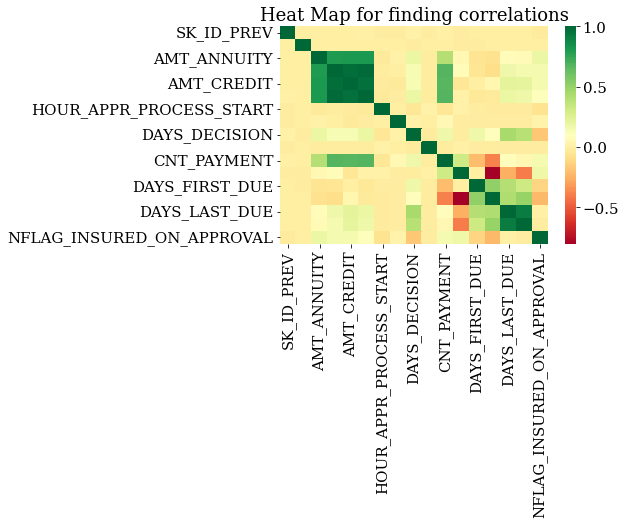

In [56]:
sns.heatmap(df2[prev_numerical].corr(),cmap='RdYlGn')
plt.title('Heat Map for finding correlations')
plt.show()

# Merging both the datasets

In [82]:
###Merging application data an previous application data
merge_data=pd.merge(df1,df2,on='SK_ID_CURR',how='inner')

In [84]:
merge_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'f_approved'],
      dtype='object', length=114)

In [85]:
merge_numeric=merge_data.select_dtypes(include=['int','float']).columns

In [86]:
merge_categorical=merge_data.select_dtypes(include=['object']).columns

In [87]:
merge_0=merge_data.loc[merge_data.TARGET==0]

In [89]:
merge_1=merge_data.loc[merge_data.TARGET==1]

In [ ]:
####

for cols in merge_categorical:
    plt.figure(figsize=(10,6))
    #ax=plt.subplot(221)
    #plt.title('Plotting for '+cols)
    #sns.countplot(merge_data[cols])
    #plt.show()
    #print("==============================")
    
    ax1=plt.subplot(222)
    merg=pd.DataFrame()
    merg['0']=(merge_train_0[cols].value_counts())/len(merge_train_0[cols])
    merg['1']=(merge_train_1[cols].value_counts())/len(merge_train_1[cols])
    plt.title('Plotting for '+cols)
    
    merg.plot.bar(ax=ax1)
    plt.show()
    print("==============================")
    
    
    
    
    

In [1]:
###### PRODUCT_COMBINATION
- Cash product combination is the highest and are non-defaulters comparatively
##### CHANNEL_TYPE
- Credit and cash offices (non-defaulters)
##### NAME_PORTFOLIO
- POS highest but (Defaulters)
##### NAME_TYPE_SUITE
- Unaccompanied are defaulters
###### CODE_REJECT_REASON
- XAP are defaulters
##### NAME_CONTRACT_STATUS
- Loan `approved` clients tend to default...That are cancelled/Refused have high chances of paying back the loan 

SyntaxError: invalid syntax (<ipython-input-1-ba644def4c2f>, line 2)

##### Insights of merged datasets